In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [5]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes = pd.read_csv(filename, names=names)
array = diabetes.values

In [8]:
diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes.class.unique()
#iris.Species.unique()

SyntaxError: invalid syntax (<ipython-input-11-9a9efff96550>, line 1)

In [12]:
diabetes['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [13]:
X = array[:,0:8]
Y = array[:,8]

In [14]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [16]:
#Splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=40)

In [ ]:
#Decision Tree Entropy

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

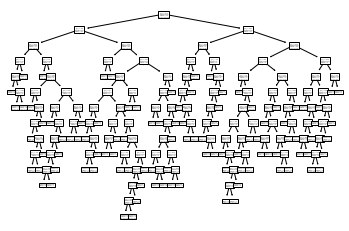

In [18]:
#PLot the decision tree
tree.plot_tree(model);

IndexError: list index out of range

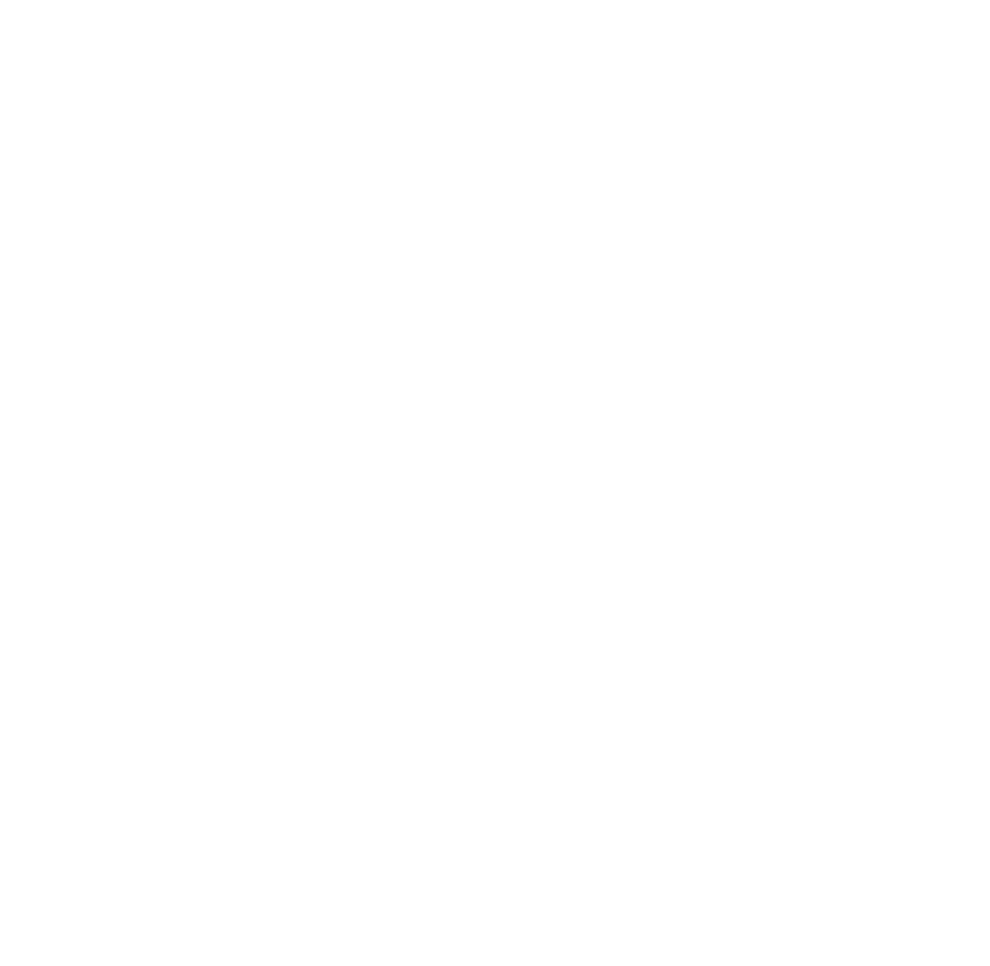

In [20]:
#fn=['preg (cm)','plas (cm)','pres (cm)','skin (cm)','test (cm)','mass (cm)','pedi (cm)','age (cm)']
fn=['preg','plas','pres','skin','test','mass','pedi','age']
cn=['class']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [21]:
preds=model.predict(x_test)

In [22]:
pd.Series(preds).value_counts() # getting the count of each category 

0.0    100
1.0     54
dtype: int64

In [23]:
pd.crosstab(preds,y_test)

col_0,0.0,1.0
row_0,,
0.0,78,22
1.0,17,37


In [24]:
# Accuracy 
np.mean(preds==y_test)

0.7467532467532467

In [ ]:
#Decision Tree Reclassifier gini

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [26]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

0.7792207792207793

In [28]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [30]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [31]:
preds=model.predict(x_test)

In [32]:
preds

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1.])

In [33]:
pd.crosstab(preds,y_test)

col_0,0.0,1.0
row_0,,
0.0,77,21
1.0,18,38


In [34]:
np.mean(preds==y_test)

0.7467532467532467